In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output
import torch
import time
import os

In [17]:
loss_optimal = 0.5957541465759277
np.random.seed(45)
num_samples = 40

# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

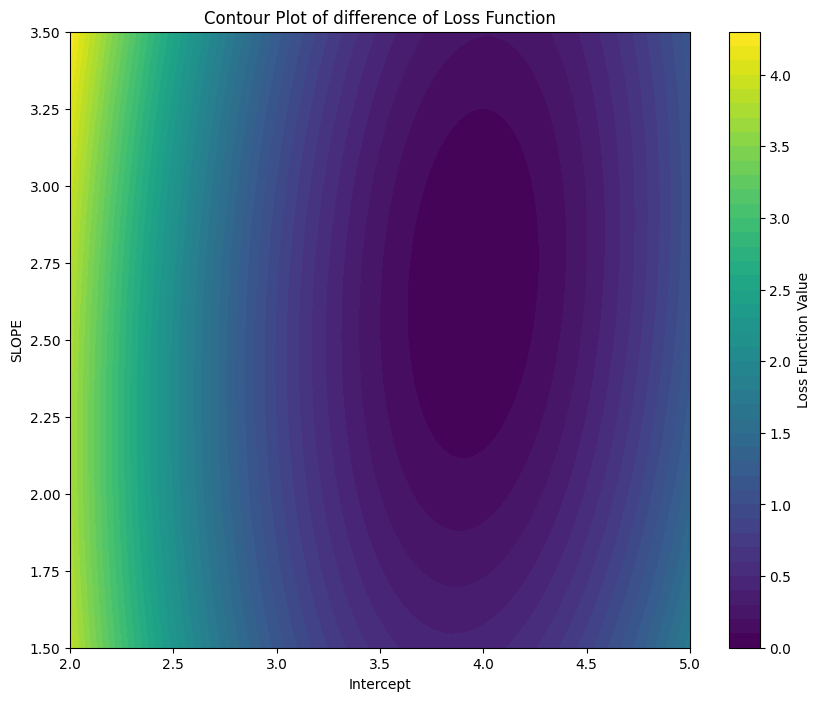

In [18]:

slope_range = np.linspace(1.5,3.5, 100) #theta1
intercept_range = np.linspace(2,5, 100) #theta0
SLOPE, INTERCEPT = np.meshgrid(slope_range, intercept_range)

loss_grid = np.zeros(SLOPE.shape)

for i in range(SLOPE.shape[0]):
    for j in range(SLOPE.shape[1]):
        slope_ij = SLOPE[i, j]
        intercept_ij = INTERCEPT[i, j]
        loss_grid[i, j] = ((y - x1 * slope_ij - intercept_ij) ** 2).mean() - loss_optimal

plt.figure(figsize=(10, 8))
contour = plt.contourf(INTERCEPT, SLOPE, loss_grid, levels=50, cmap='viridis')
plt.colorbar(contour, label='Loss Function Value')
plt.xlabel('Intercept')
plt.ylabel('SLOPE')
plt.title('Contour Plot of difference of Loss Function')
plt.show()


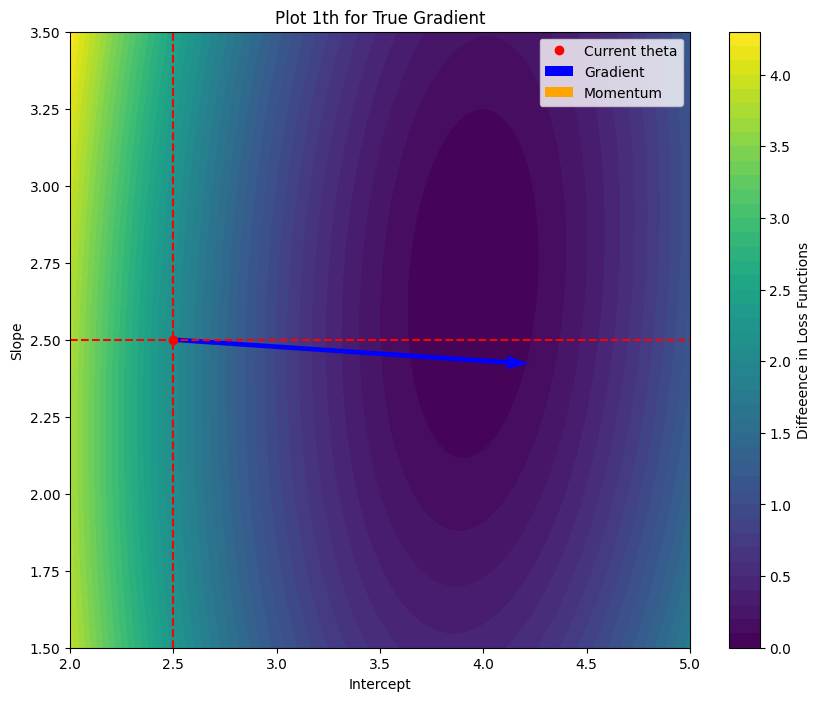

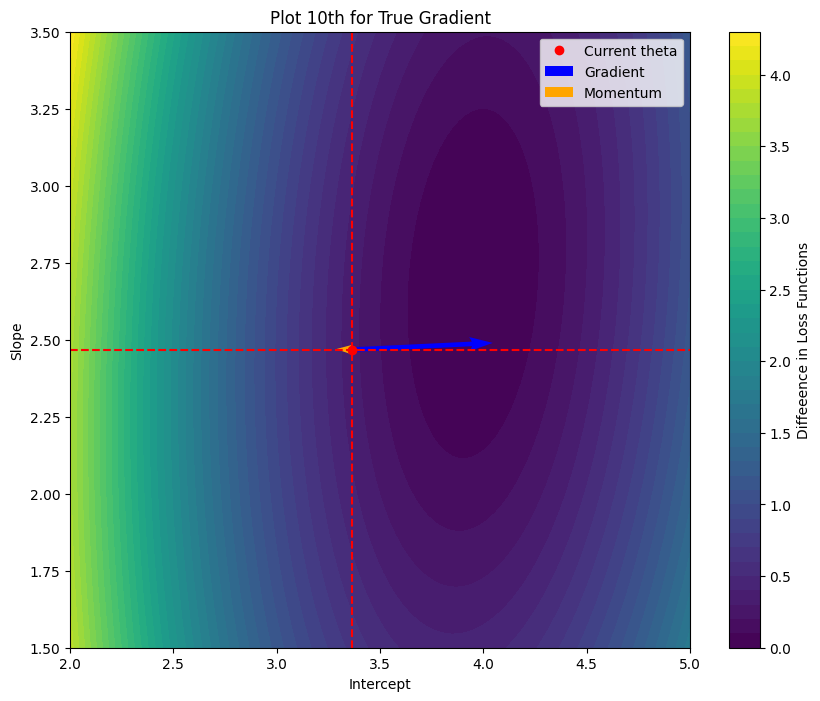

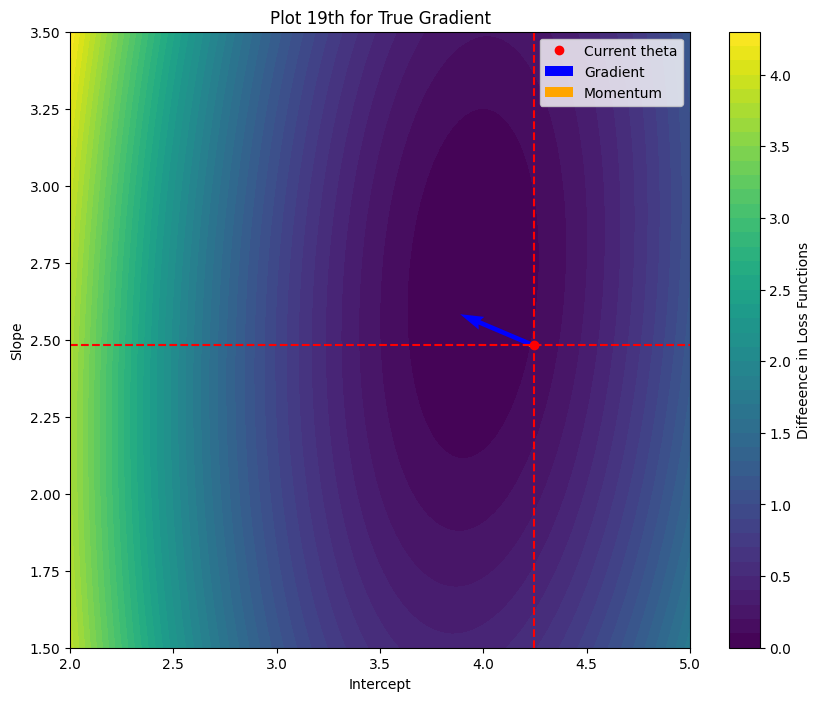

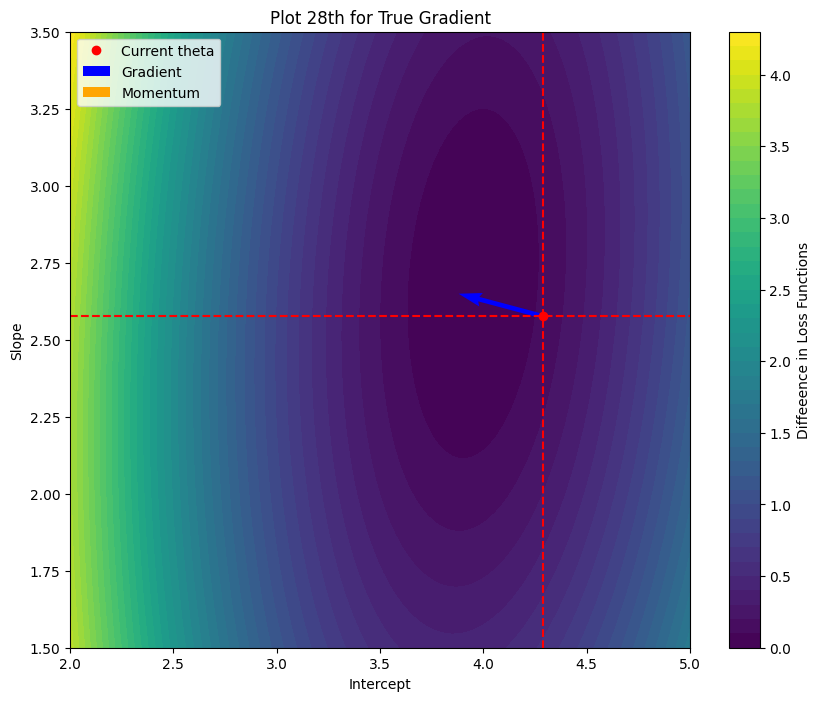

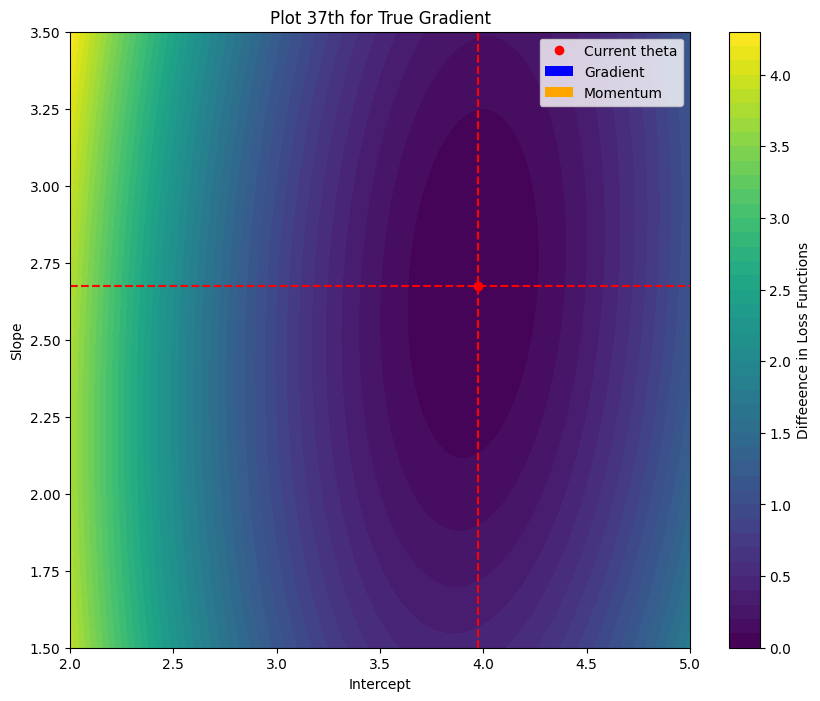

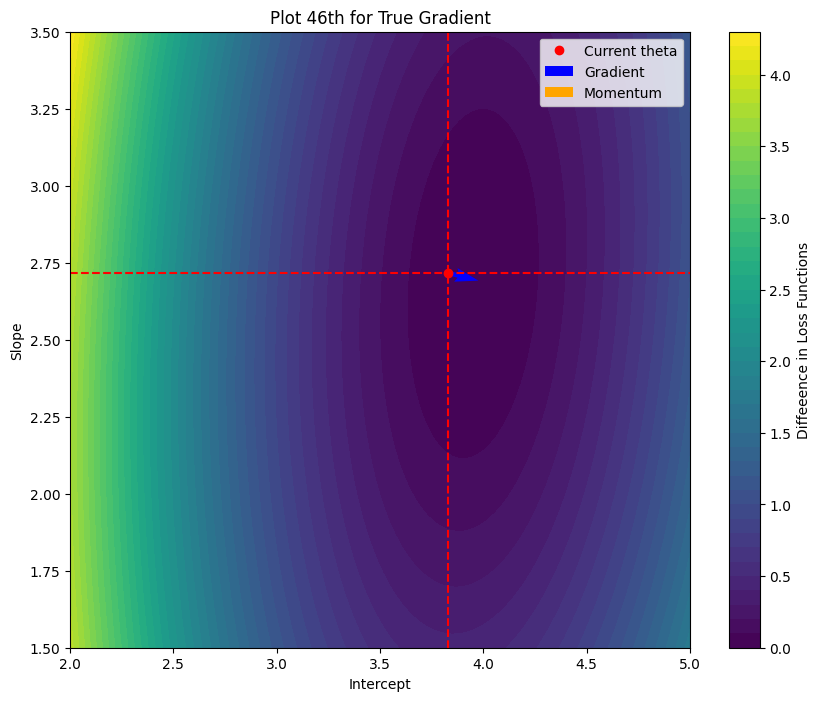

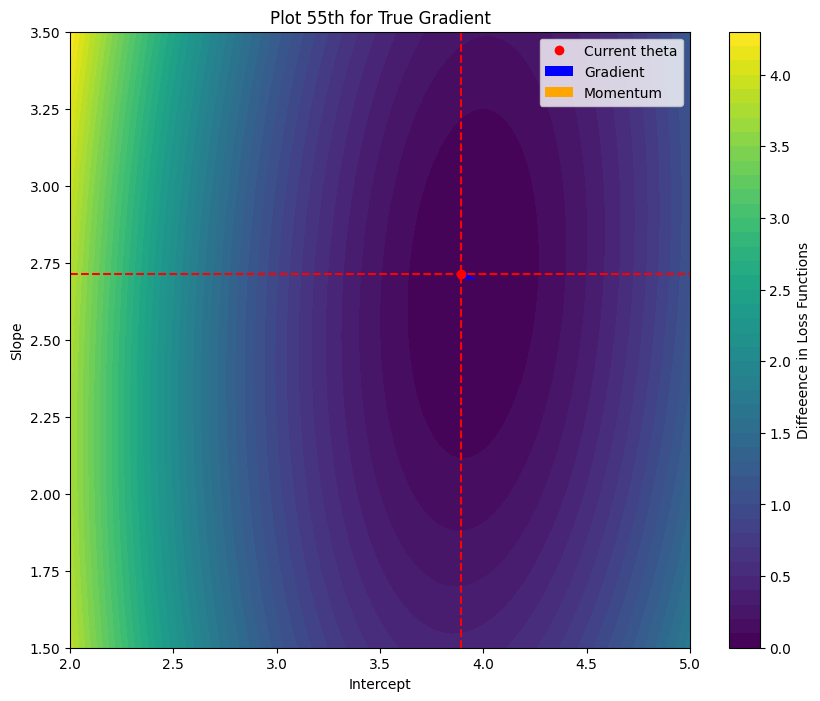

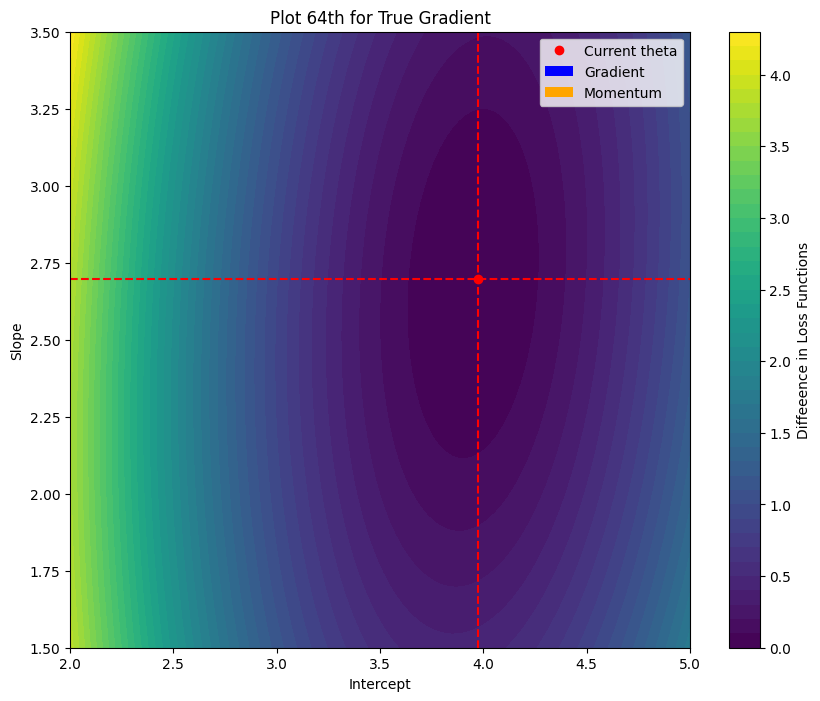

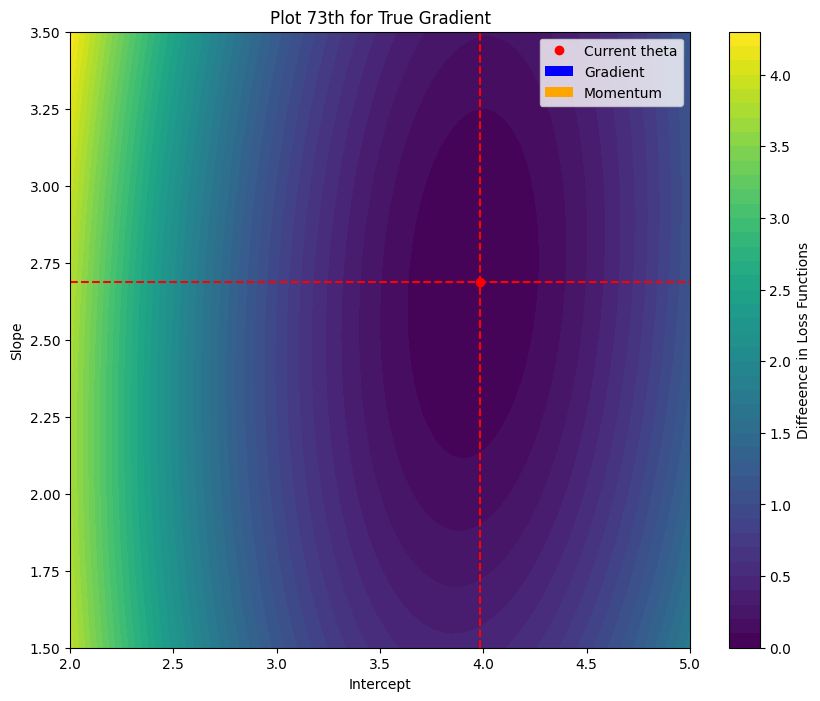

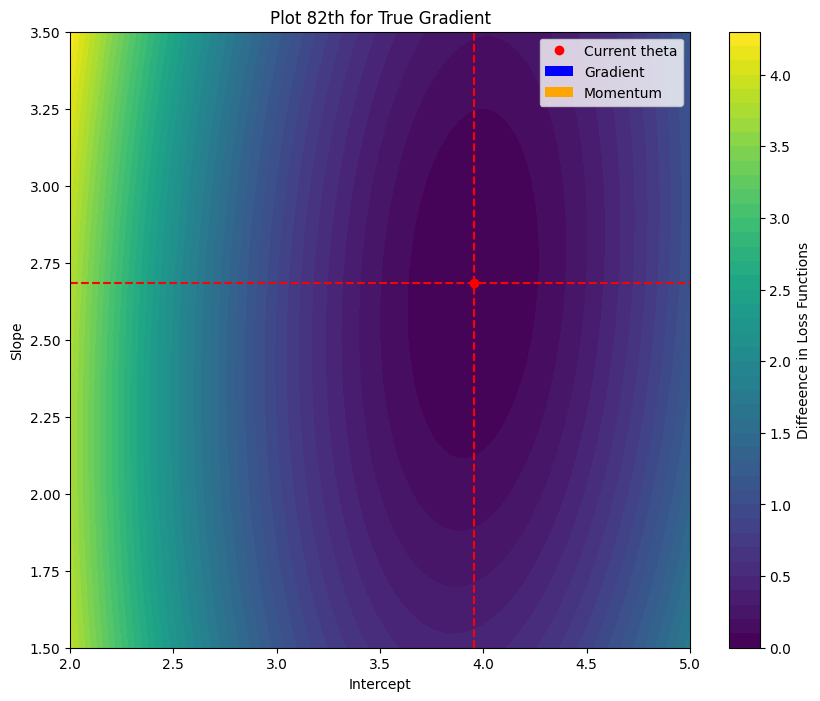

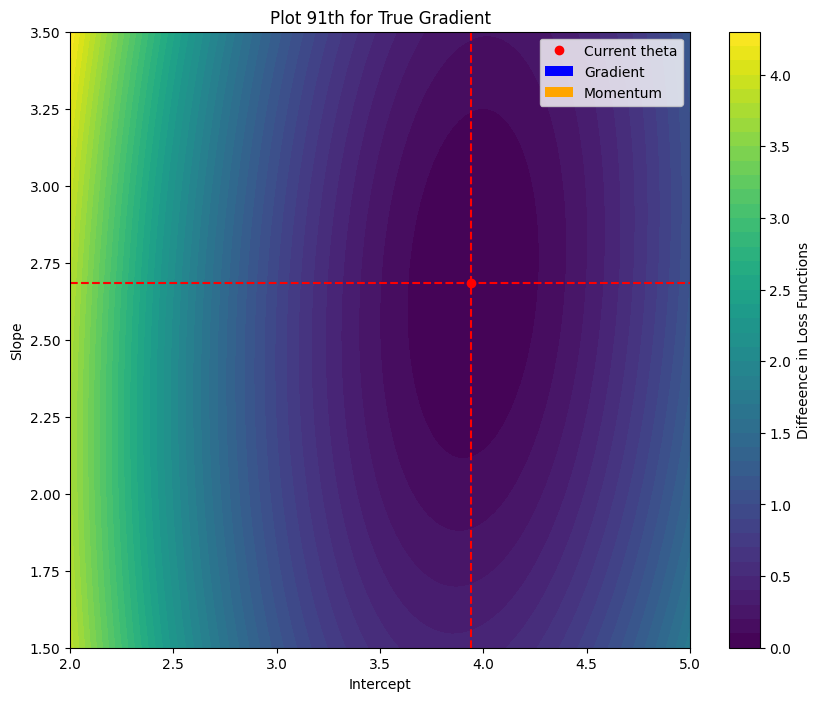

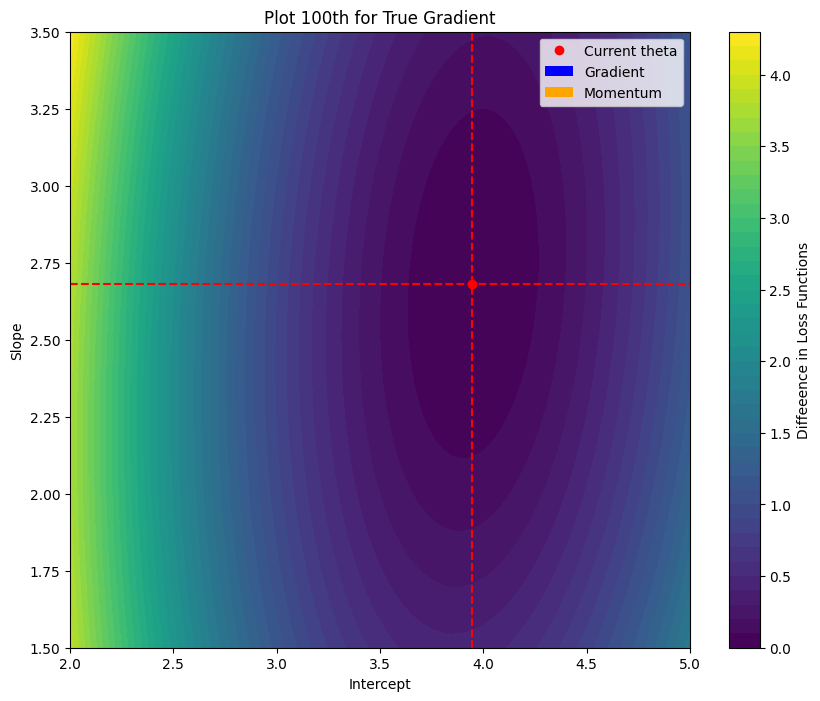

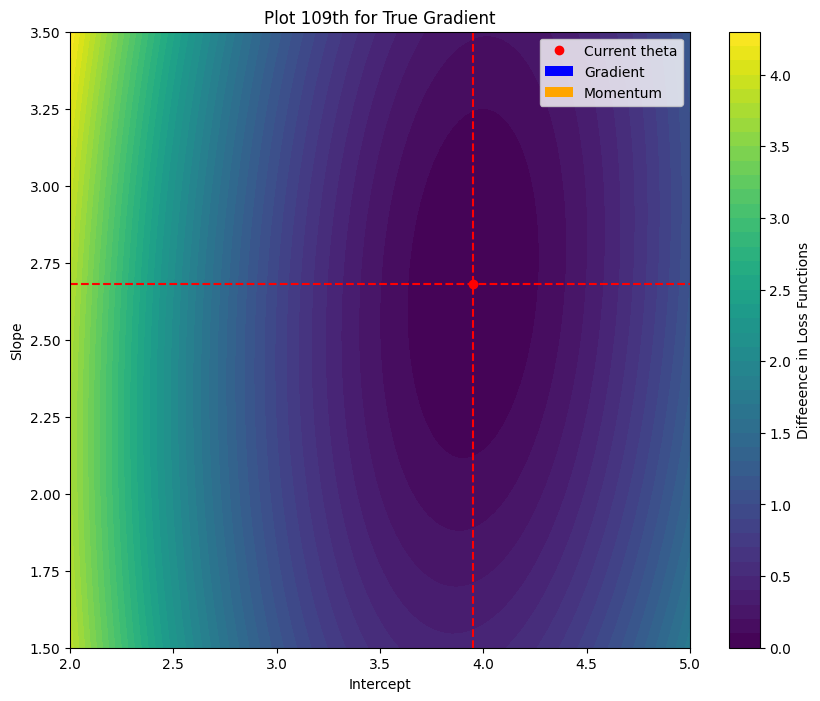

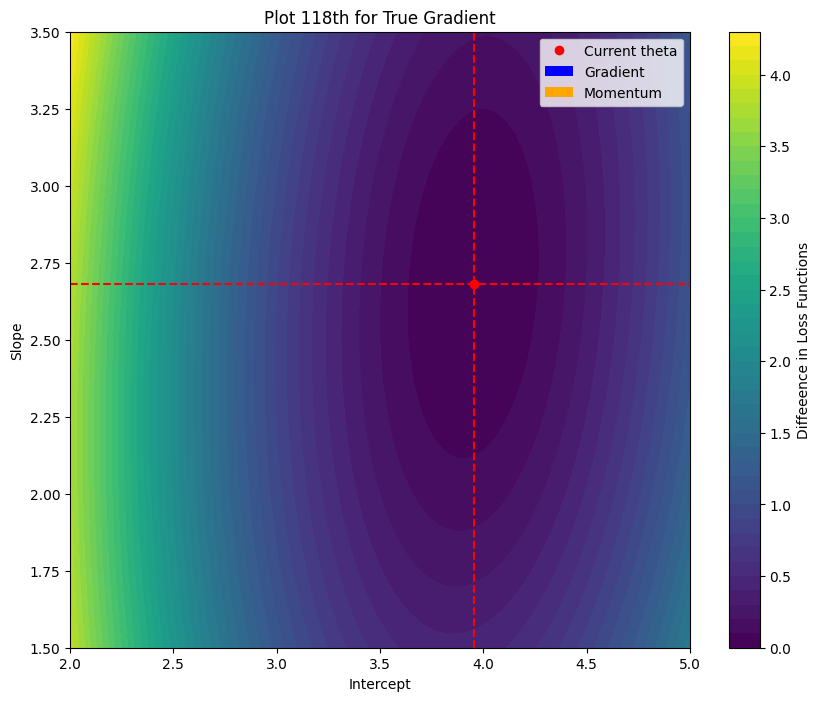

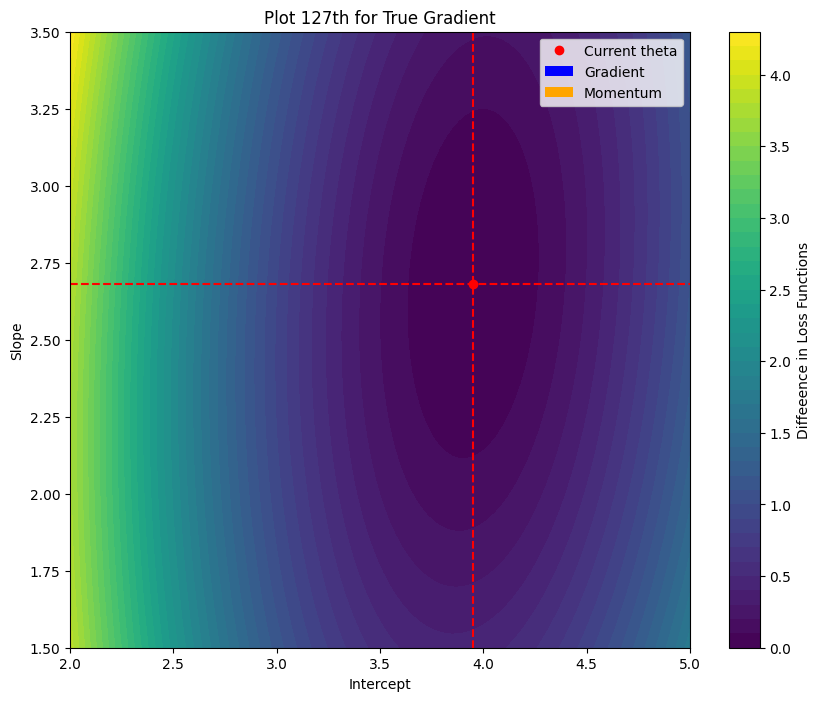

In [22]:
csv_file_path = 'true_gradient_momentum.csv'
df_csv = pd.read_csv(csv_file_path)

#val_theta0,val_theta1,loss_values,grad_theta0,grad_theta1,momentum_theta0,momentum_theta1


theta0_list = df_csv['val_theta0'].values
theta1_list = df_csv['val_theta1'].values
loss_list = df_csv['loss_values'].values
grad_theta0_list = df_csv['grad_theta0'].values
grad_theta1_list = df_csv['grad_theta1'].values
momentum_theta0_list = df_csv['momentum_theta0'].values
momentum_theta1_list = df_csv['momentum_theta1'].values

iterations = 15
val_skip = len(theta0_list) // iterations
print(val_skip)

iterations = np.linspace(0, len(theta0_list)-1, iterations, dtype=int)


for a in iterations:

    plt.figure(figsize=(10, 8))
    contour = plt.contourf(INTERCEPT, SLOPE, loss_grid, levels=50, cmap='viridis')
    plt.colorbar(contour, label="Diffeeence in Loss Functions")
    plt.xlabel('Intercept')
    plt.ylabel('Slope')
    # plt.title(f'Iteration {a + 1}th for Gradient Descent with Momentum')

    theta0 = theta0_list[a]
    theta1 = theta1_list[a]

    plt.plot(theta0, theta1, 'ro', label='Current theta')

    grad_theta0 = grad_theta0_list[a]
    grad_theta1 = grad_theta1_list[a]
    plt.quiver(theta0, theta1, -grad_theta0, -grad_theta1, color='blue', scale=5, label='Gradient', angles='xy')

    momentum_theta0 = momentum_theta0_list[a]
    momentum_theta1 = momentum_theta1_list[a]
    plt.quiver(theta0, theta1, momentum_theta0, momentum_theta1, color='orange', scale=5, label='Momentum', angles='xy')


    plt.title(f'Plot {a+1}th for True Gradient')


    plt.axhline(y=theta1, color='red', linestyle='--')
    plt.axvline(x=theta0, color='red', linestyle='--')

    plt.legend()
    display(plt.gcf())
    clear_output(wait=True)
    time.sleep(0.4)

plt.show()

Saving the figure

In [25]:
iterations = 200
val_skip = len(theta0_list) // iterations
print(val_skip)
iterations = np.linspace(0, len(theta0_list) - 1, iterations, dtype=int)

save_dir = '/Users/tejasmacipad/Desktop/Second_yr/Machine_Learning/es335-24-fall-assignment-2/Plot_figures/PLOT_FBYM'


for a in iterations:

    plt.figure(figsize=(10, 8))
    contour = plt.contourf(INTERCEPT, SLOPE, loss_grid, levels=50, cmap='viridis')
    plt.colorbar(contour, label="Difference in Loss Functions")
    plt.xlabel('Intercept')
    plt.ylabel('Slope')

    theta0 = theta0_list[a]
    theta1 = theta1_list[a]
    plt.plot(theta0, theta1, 'ro', label='Current theta')

    grad_theta0 = grad_theta0_list[a]
    grad_theta1 = grad_theta1_list[a]
    plt.quiver(theta0, theta1, -grad_theta0, -grad_theta1, color='blue', scale=5, label='Gradient', angles='xy')

    momentum_theta0 = momentum_theta0_list[a]
    momentum_theta1 = momentum_theta1_list[a]
    plt.quiver(theta0, theta1, momentum_theta0, momentum_theta1, color='orange', scale=5, label='Momentum', angles='xy')

    plt.title(f'Plot {a + 1}th for True Gradient with Momentum')
    plt.axhline(y=theta1, color='red', linestyle='--')
    plt.axvline(x=theta0, color='red', linestyle='--')
    plt.legend()

    image_path = os.path.join(save_dir, f'plot_momentum_{a + 1}.png')
    plt.savefig(image_path)

    plt.close()


0


Momentum based SGD plots

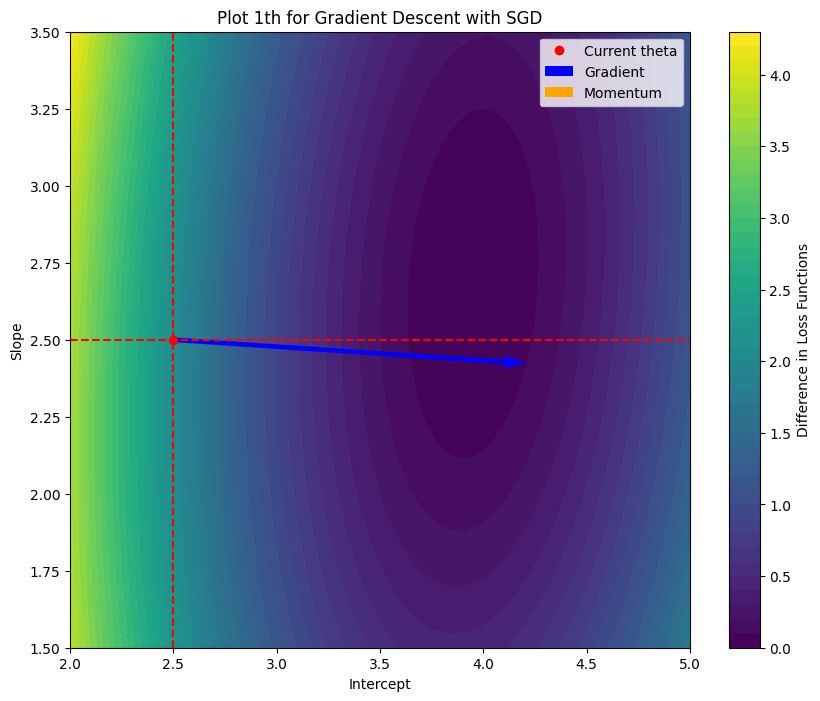

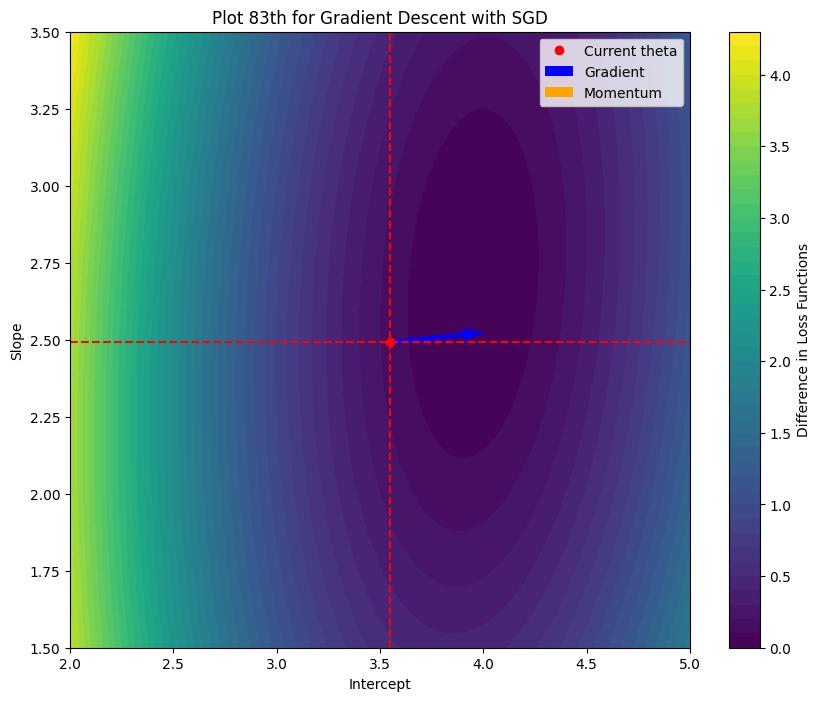

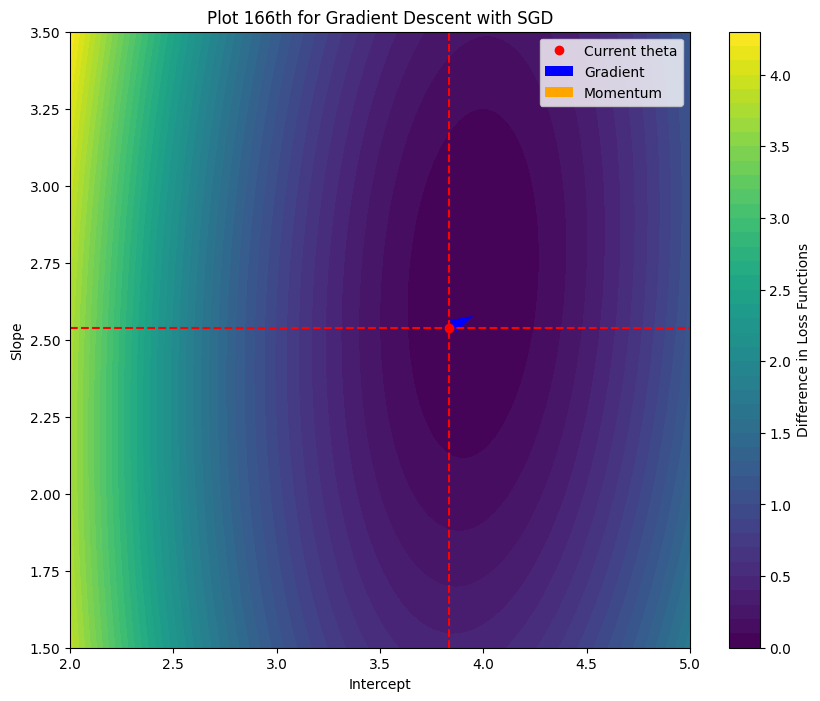

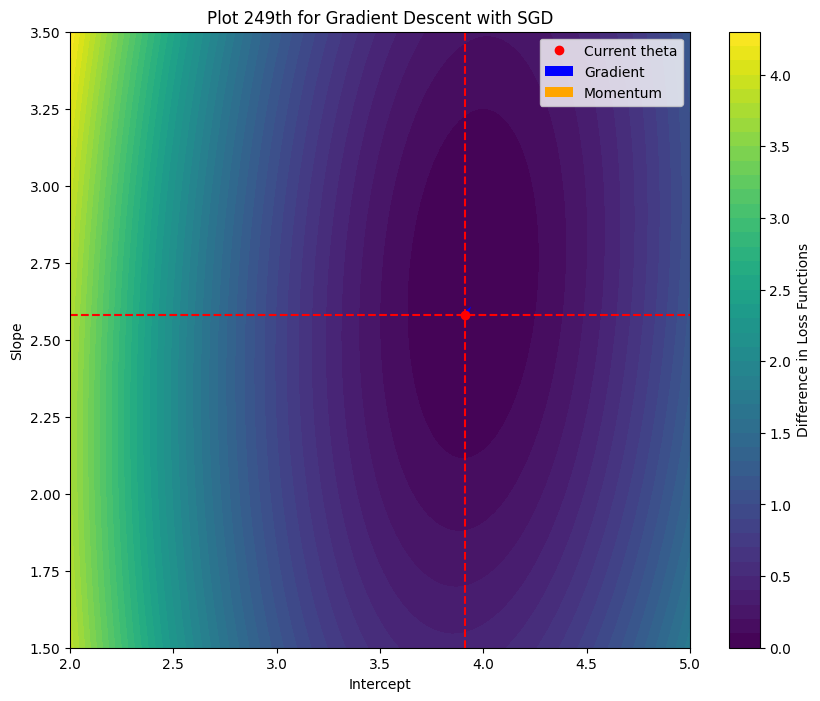

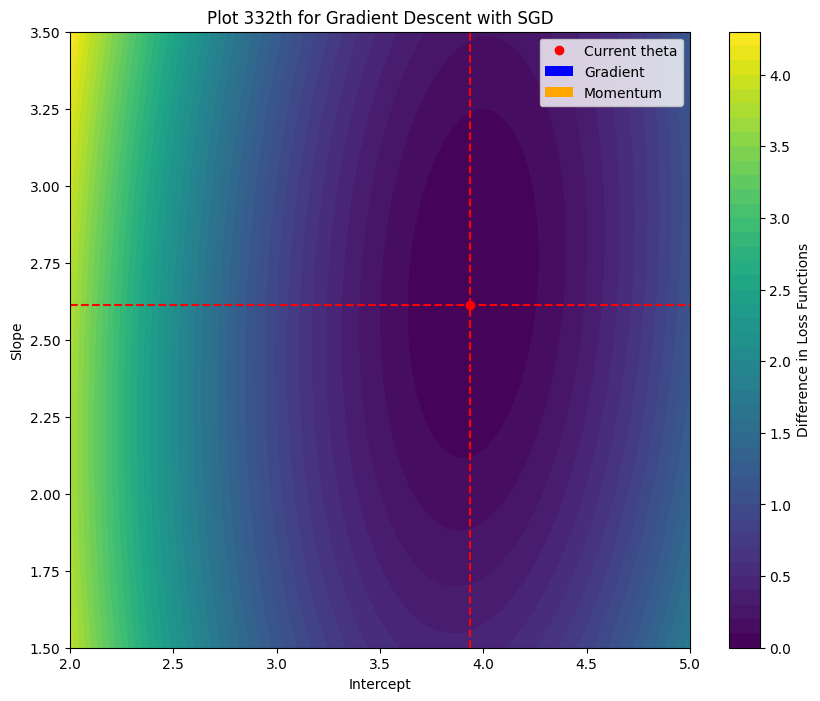

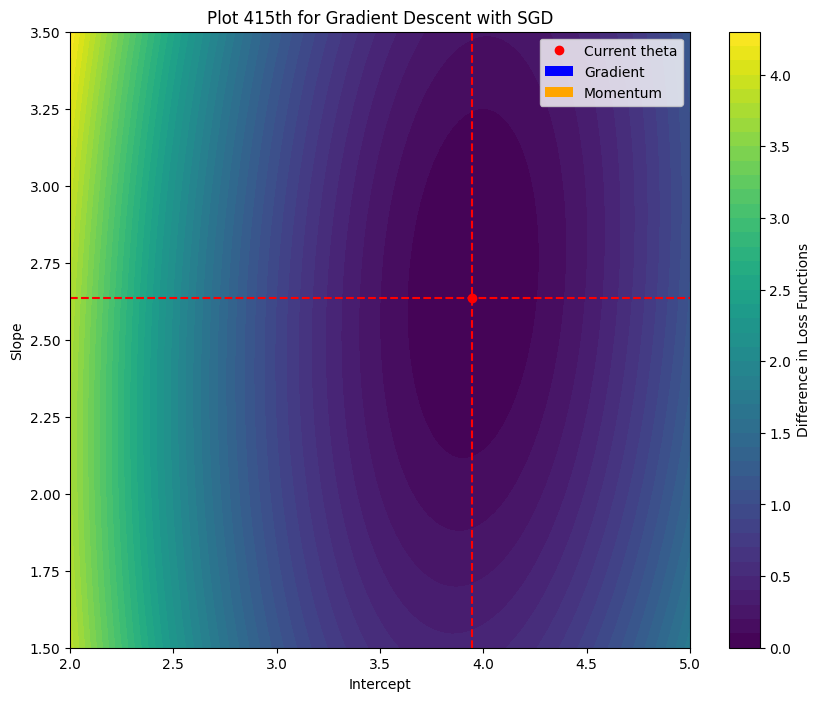

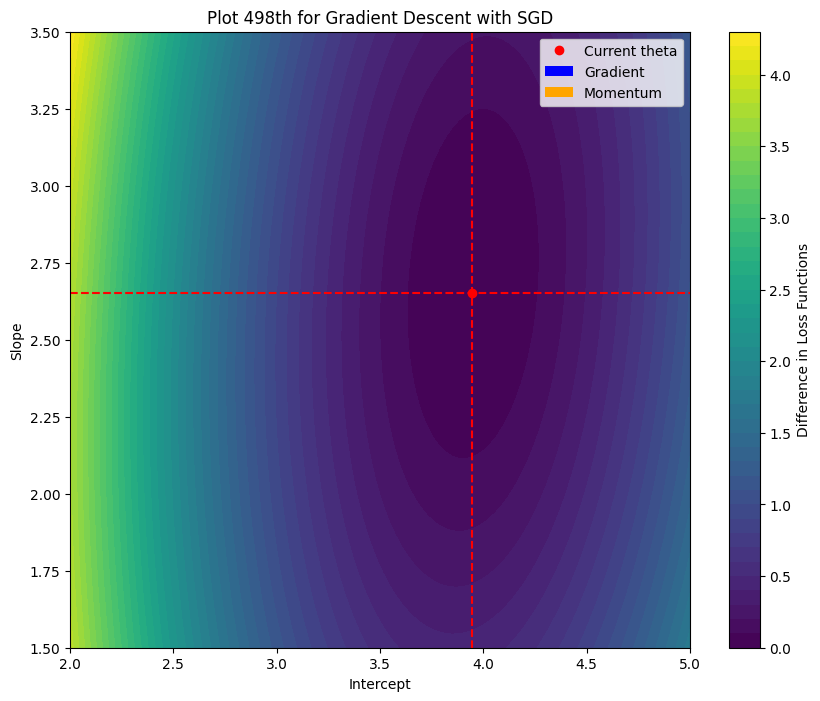

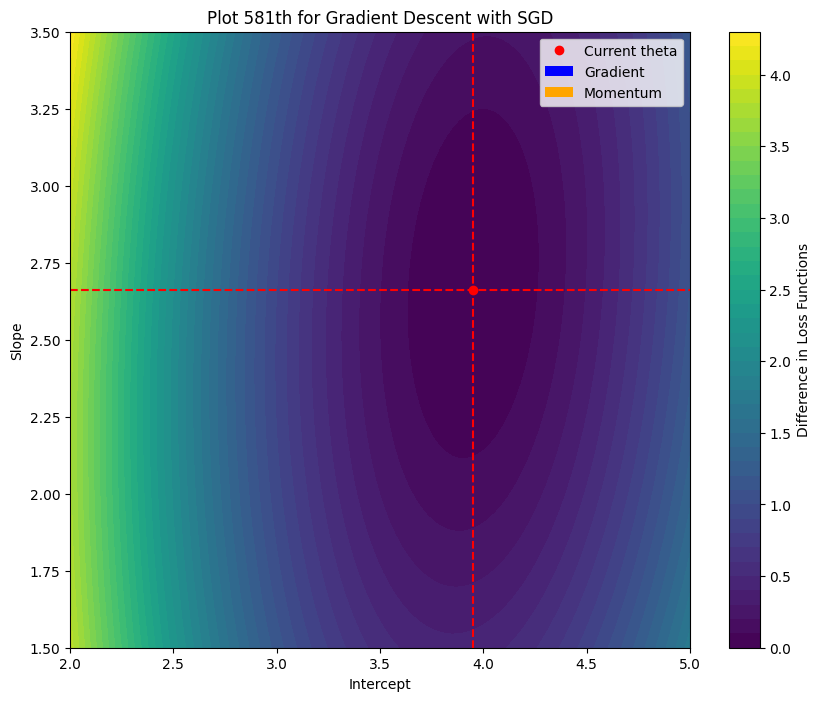

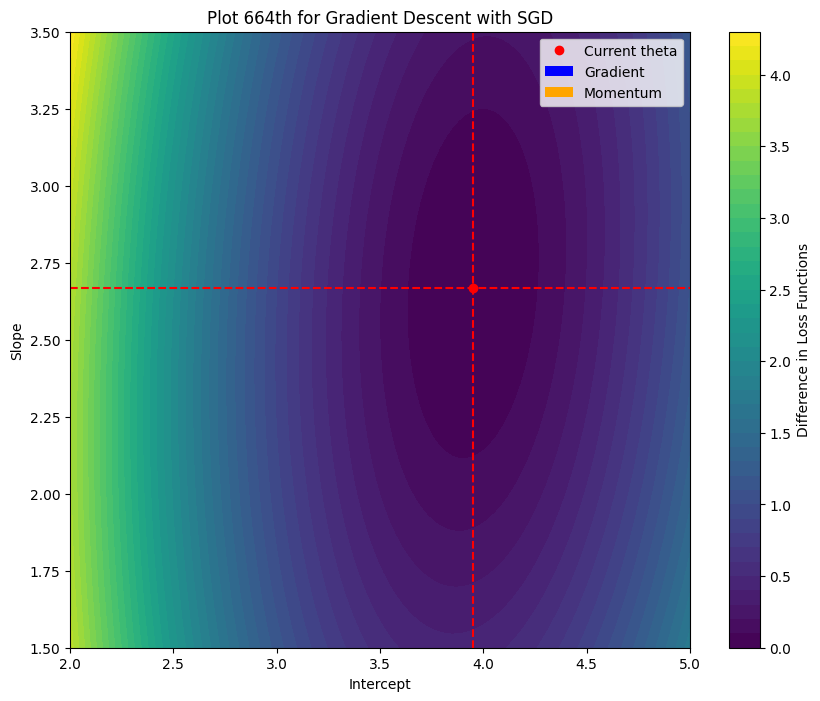

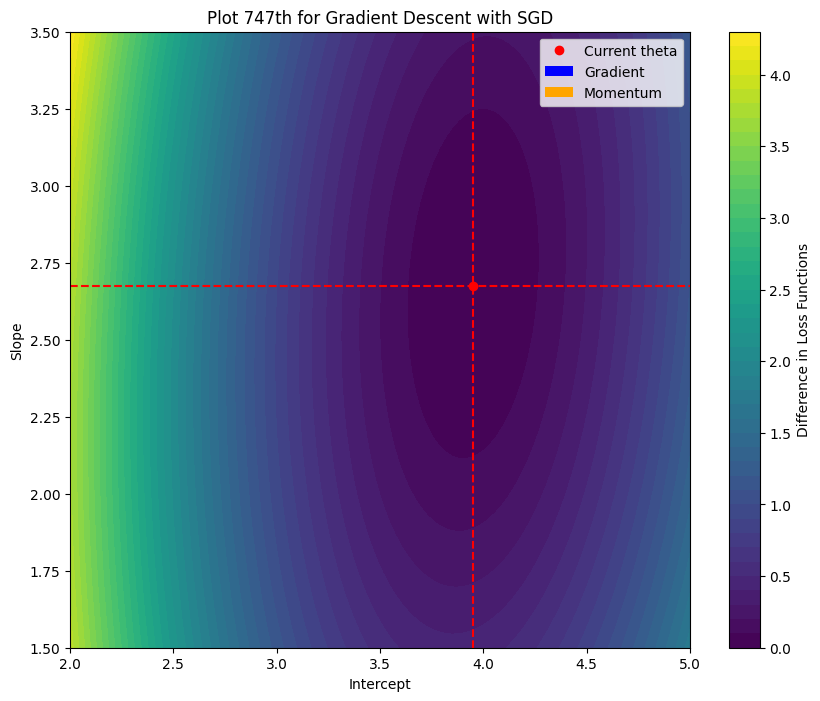

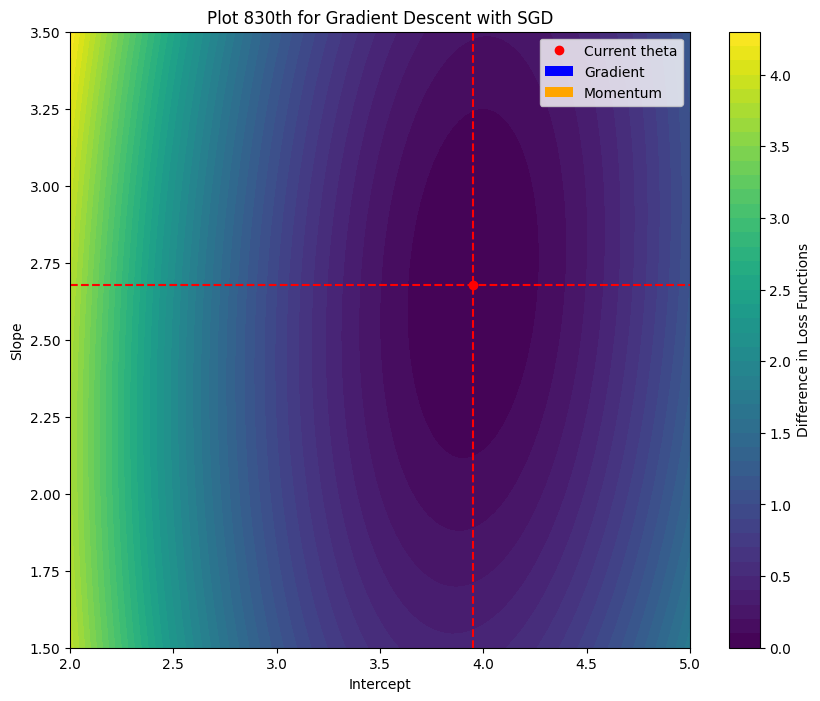

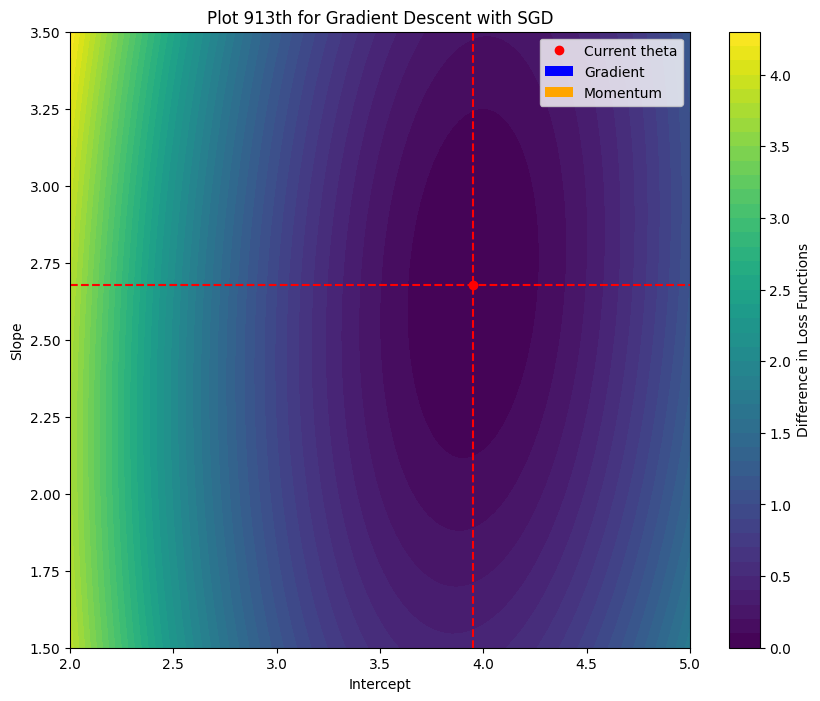

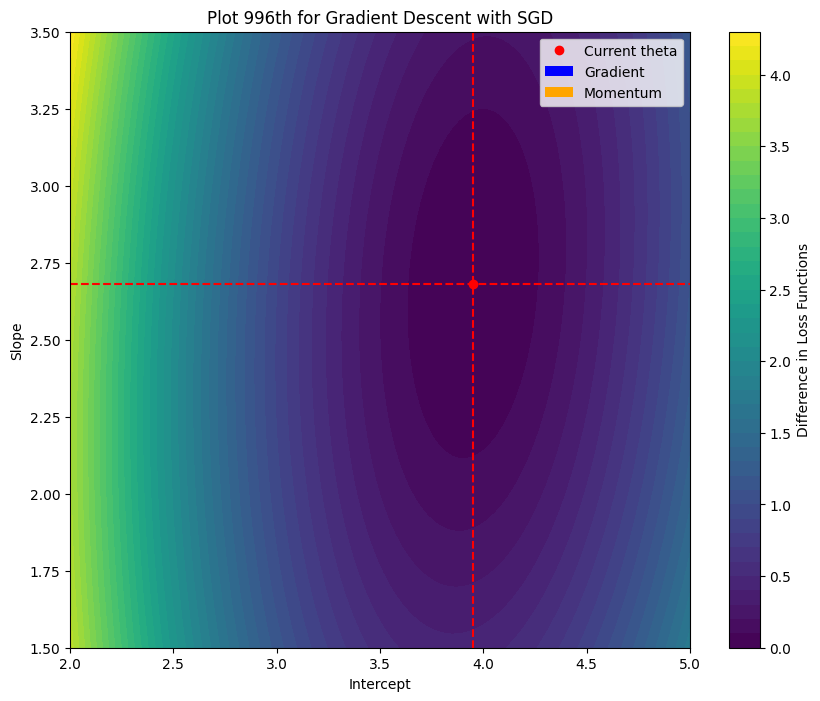

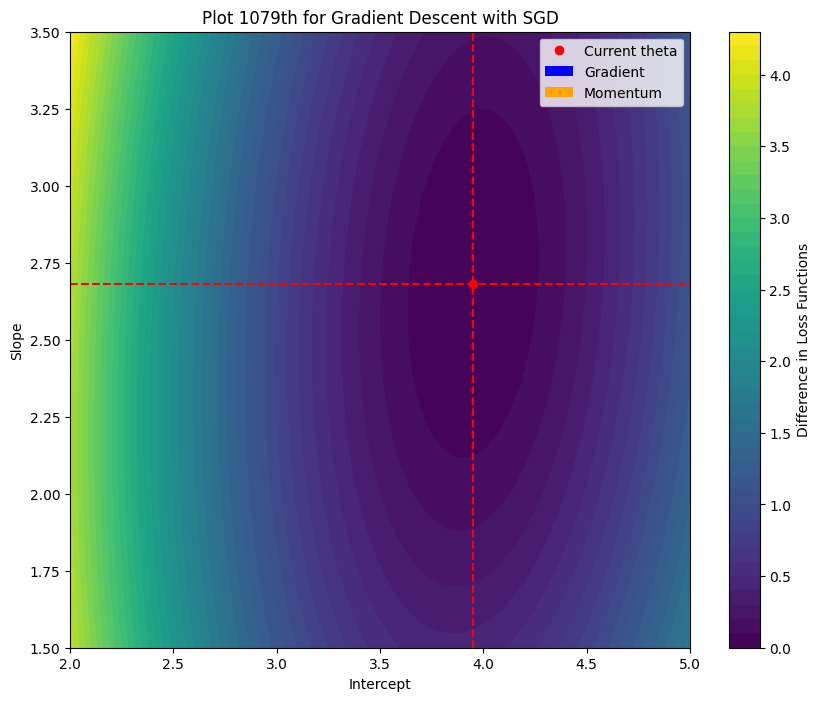

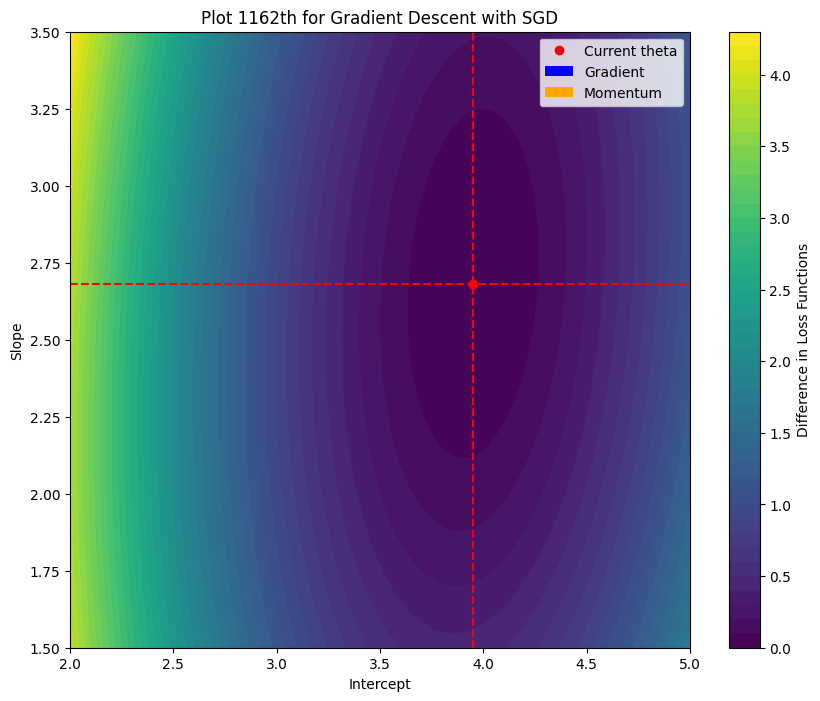

In [23]:
csv_file_path = 'true_gradient_sgd_momentum.csv'
df_csv = pd.read_csv(csv_file_path)

theta0_list_sgd = df_csv['val_theta0_sgd'].values
theta1_list_sgd = df_csv['val_theta1_sgd'].values
loss_list_sgd = df_csv['loss_values_sgd'].values
grad_theta0_list_sgd = df_csv['grad_theta0_sgd'].values
grad_theta1_list_sgd = df_csv['grad_theta1_sgd'].values
momentum_theta0_list_sgd = df_csv['momentum_theta0_sgd'].values
momentum_theta1_list_sgd = df_csv['momentum_theta1_sgd'].values

iterations = 15
val_skip = len(theta0_list_sgd) // iterations
print(val_skip)

iterations = np.linspace(0, len(theta0_list_sgd) - 1, iterations, dtype=int)

for a in iterations:
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(INTERCEPT, SLOPE, loss_grid, levels=50, cmap='viridis')
    plt.colorbar(contour, label="Difference in Loss Functions")
    plt.xlabel('Intercept')
    plt.ylabel('Slope')
    plt.title(f'Plot {a + 1}th for Gradient Descent with SGD')

    theta0 = theta0_list_sgd[a]
    theta1 = theta1_list_sgd[a]

    plt.plot(theta0, theta1, 'ro', label='Current theta')

    grad_theta0 = grad_theta0_list_sgd[a]
    grad_theta1 = grad_theta1_list_sgd[a]
    plt.quiver(theta0, theta1, -grad_theta0, -grad_theta1, color='blue', scale=5, label='Gradient', angles='xy')

    momentum_theta0 = momentum_theta0_list_sgd[a]
    momentum_theta1 = momentum_theta1_list_sgd[a]
    plt.quiver(theta0, theta1, momentum_theta0, momentum_theta1, color='orange', scale=5, label='Momentum', angles='xy')

    plt.axhline(y=theta1, color='red', linestyle='--')
    plt.axvline(x=theta0, color='red', linestyle='--')

    plt.legend()
    display(plt.gcf())
    clear_output(wait=True)
    time.sleep(0.5)

plt.show()

Saving the figures for animation

```python

In [26]:
iterations = 200
val_skip = len(theta0_list_sgd) // iterations

iterations = np.linspace(0, len(theta0_list_sgd) - 1, iterations, dtype=int)

save_dir = '/Users/tejasmacipad/Desktop/Second_yr/Machine_Learning/es335-24-fall-assignment-2/Plot_figures/PLOT_SGYM'

for a in iterations:
    plt.figure(figsize=(10, 8))
    
    contour = plt.contourf(INTERCEPT, SLOPE, loss_grid, levels=50, cmap='viridis')
    plt.colorbar(contour, label="Difference in Loss Functions")
    plt.xlabel('Intercept')
    plt.ylabel('Slope')
    plt.title(f'Plot {a + 1} for Gradient Descent with SGD and Momentum')

    theta0 = theta0_list_sgd[a]
    theta1 = theta1_list_sgd[a]
    plt.plot(theta0, theta1, 'ro', label='Current theta')

    grad_theta0 = grad_theta0_list_sgd[a]
    grad_theta1 = grad_theta1_list_sgd[a]
    plt.quiver(theta0, theta1, -grad_theta0, -grad_theta1, color='blue', scale=5, label='Gradient', angles='xy')

    momentum_theta0 = momentum_theta0_list_sgd[a]
    momentum_theta1 = momentum_theta1_list_sgd[a]
    plt.quiver(theta0, theta1, momentum_theta0, momentum_theta1, color='orange', scale=5, label='Momentum', angles='xy')

    plt.axhline(y=theta1, color='red', linestyle='--')
    plt.axvline(x=theta0, color='red', linestyle='--')

    plt.legend()
    image_path = os.path.join(save_dir, f'plot_sgd_momentum_{a + 1}.png')
    plt.savefig(image_path)

    plt.close()

Code for Mini batch gradient descent with momentum

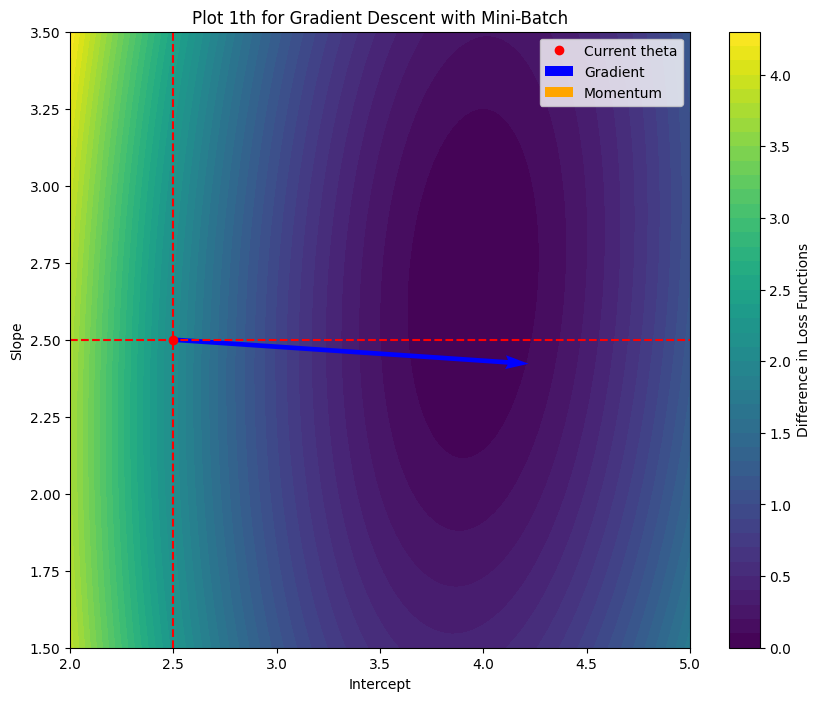

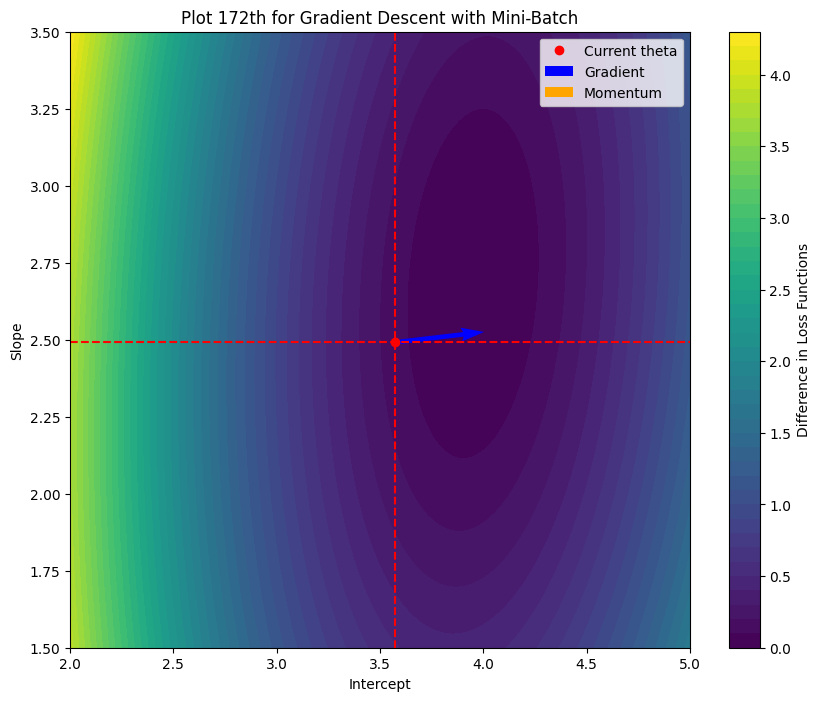

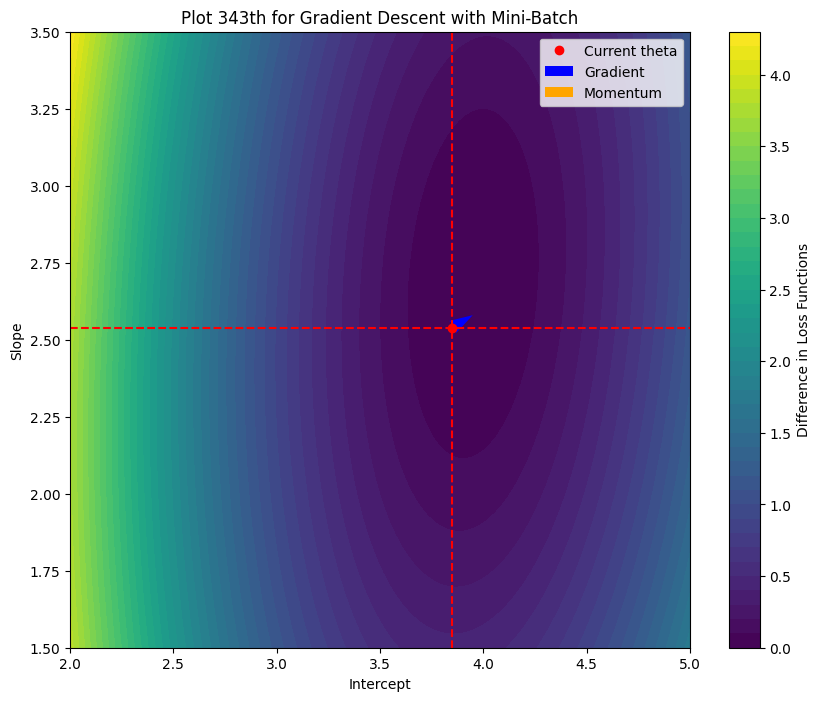

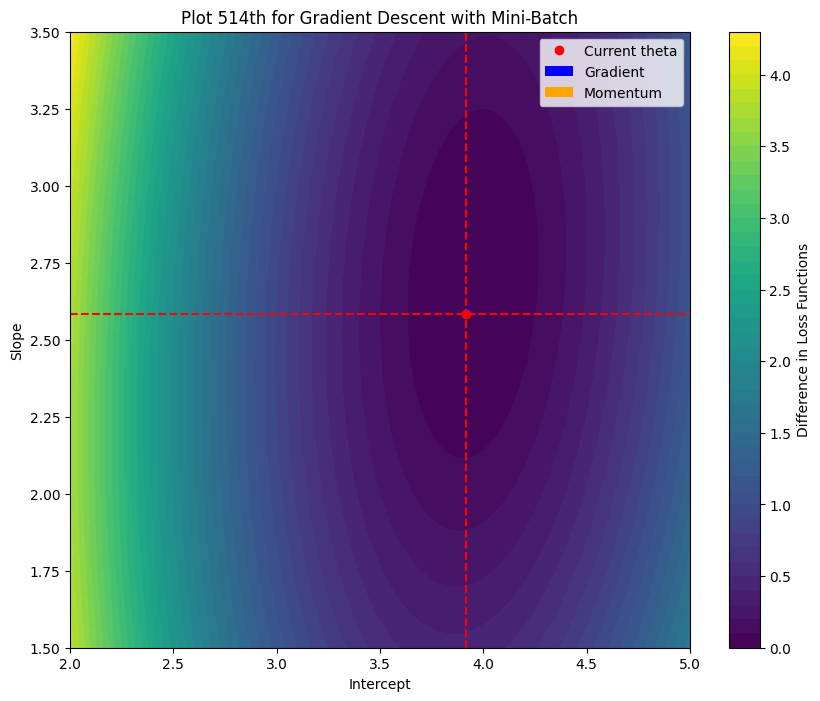

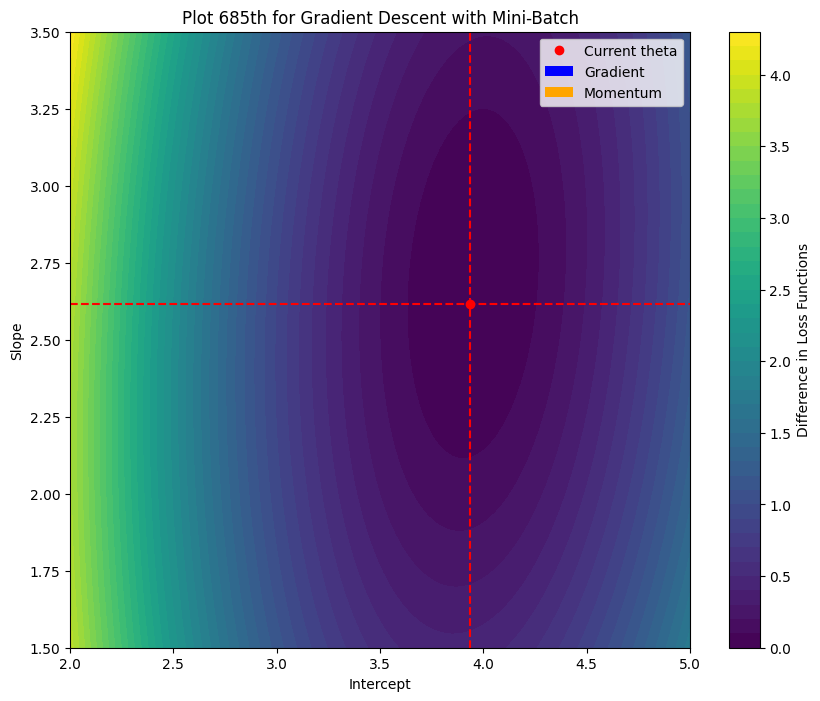

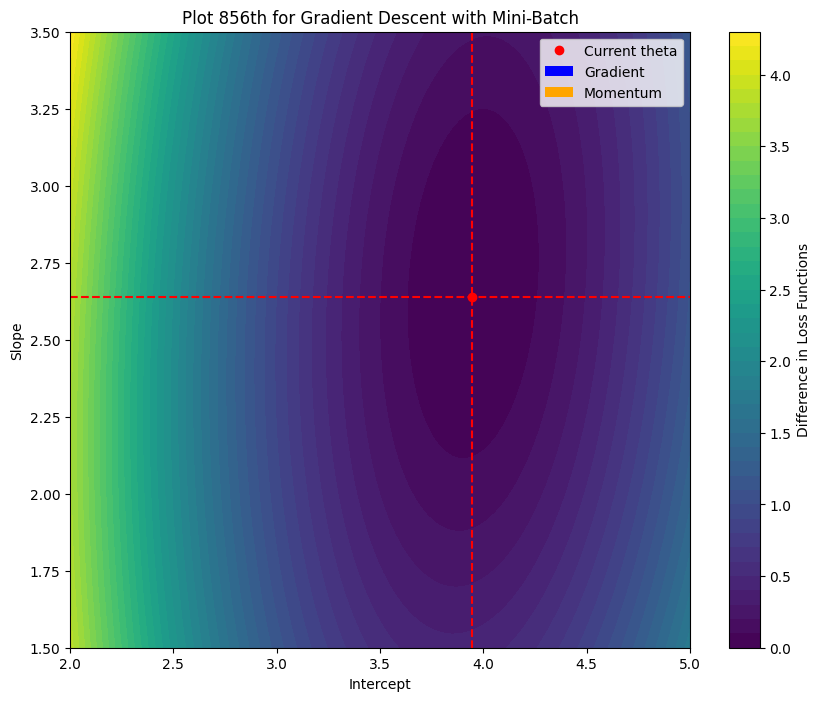

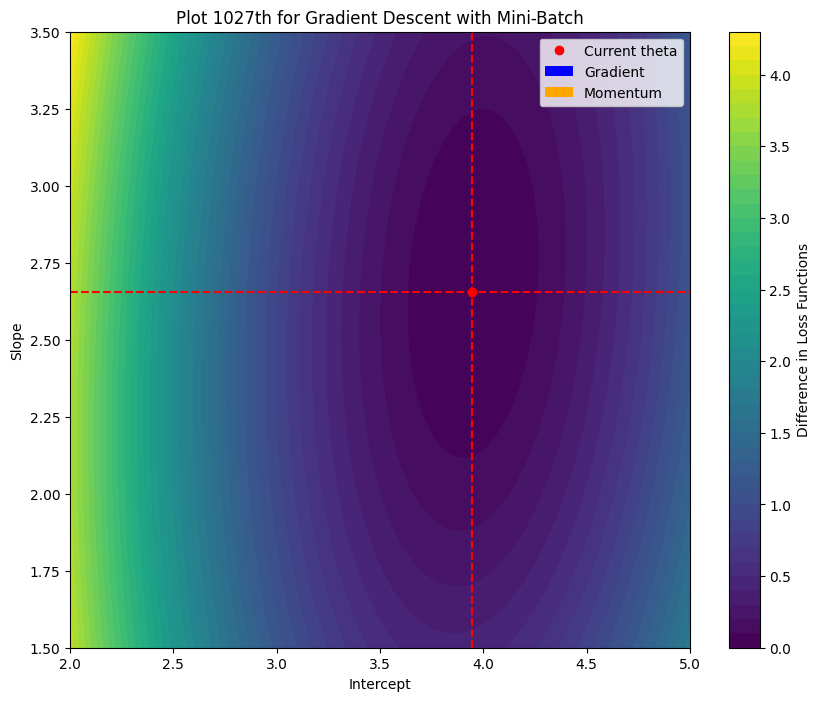

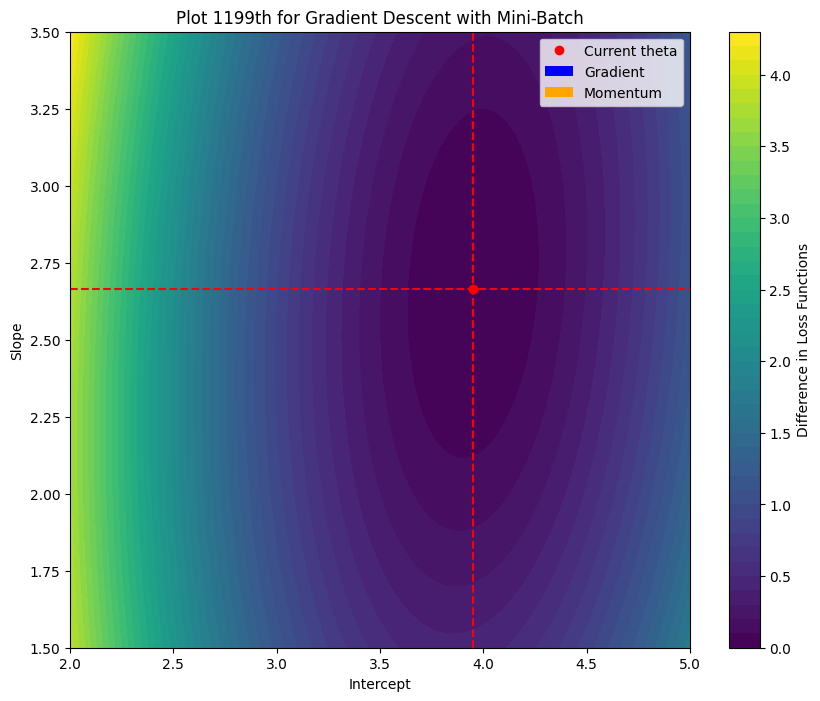

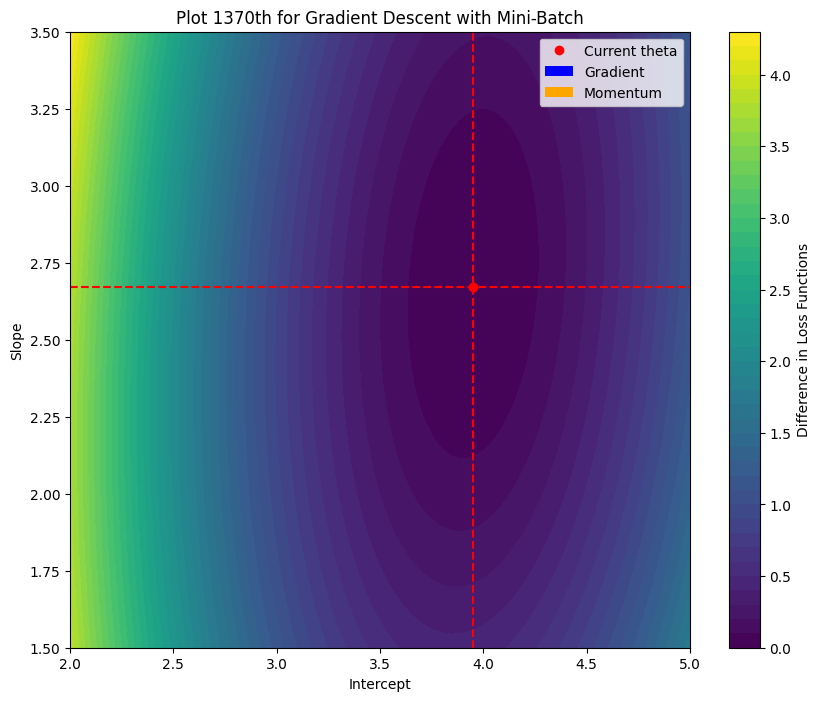

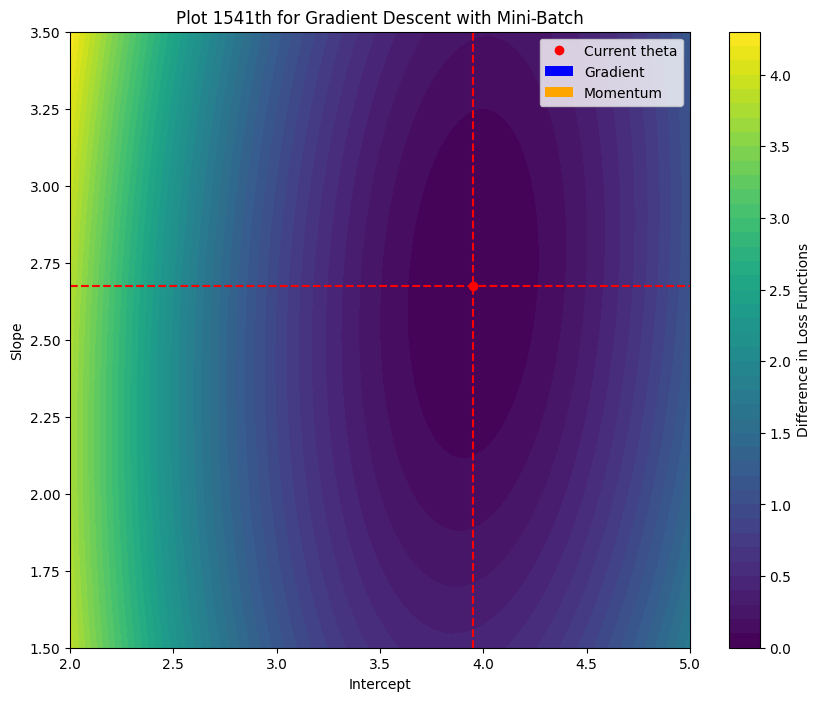

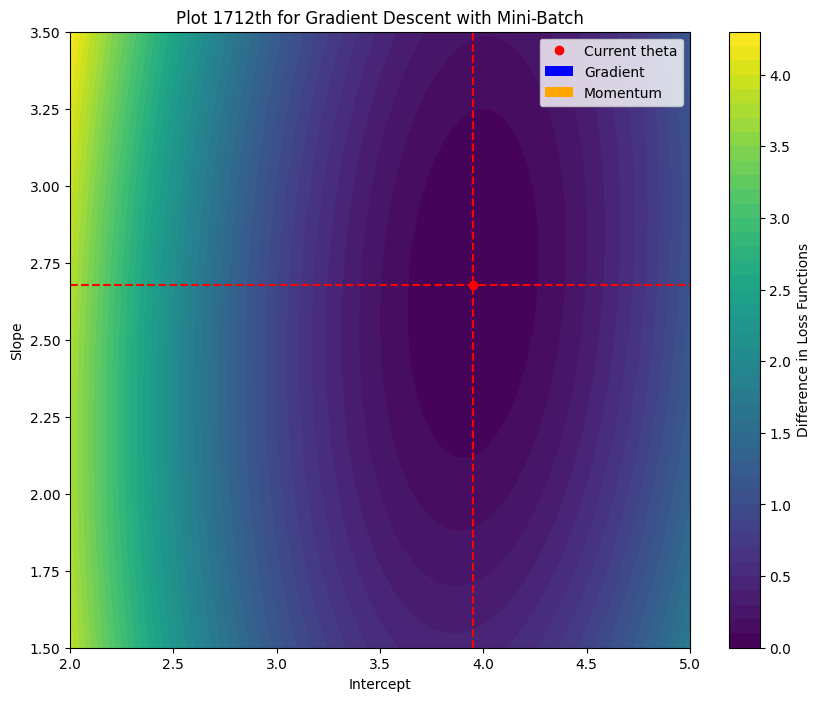

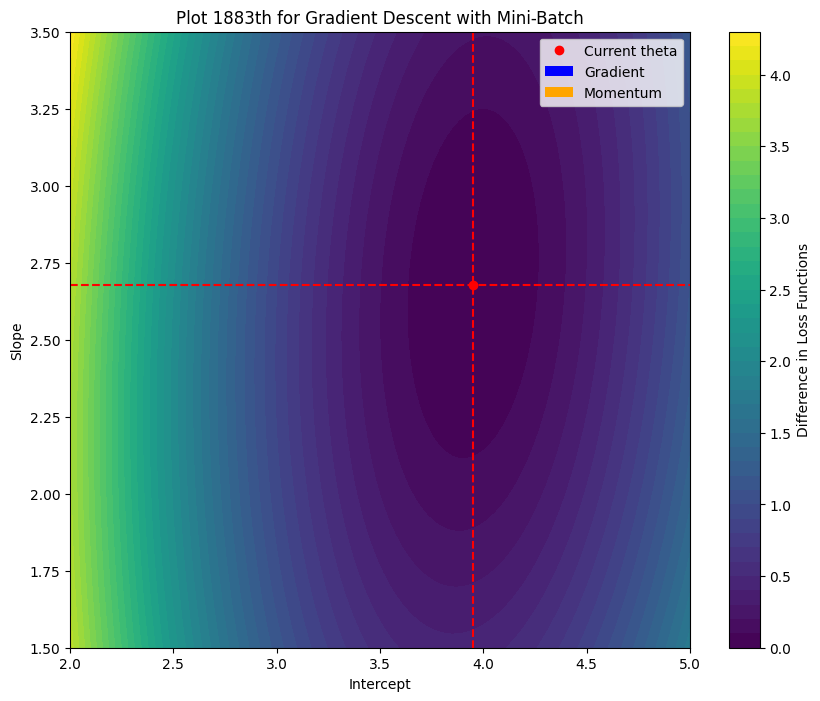

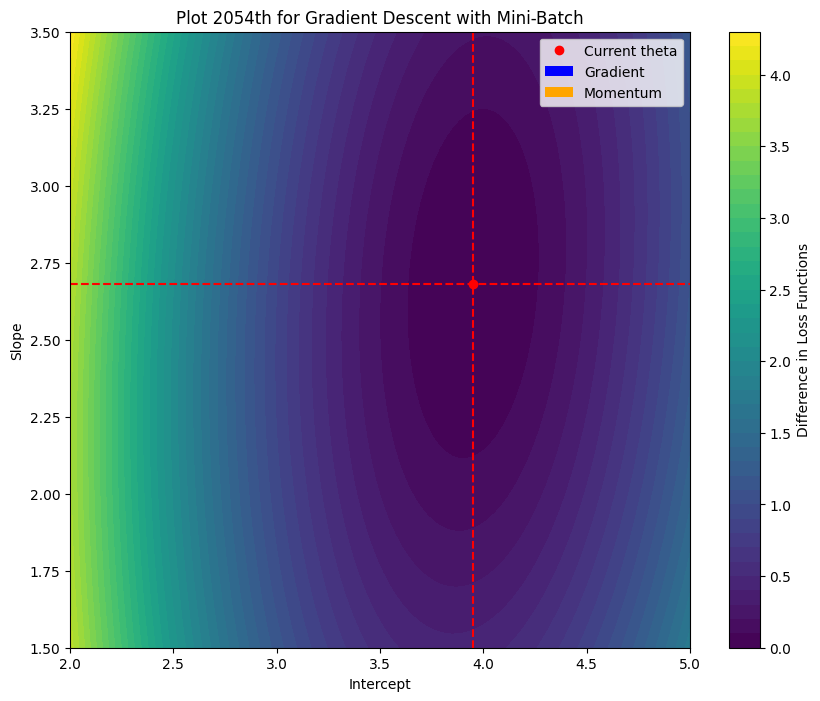

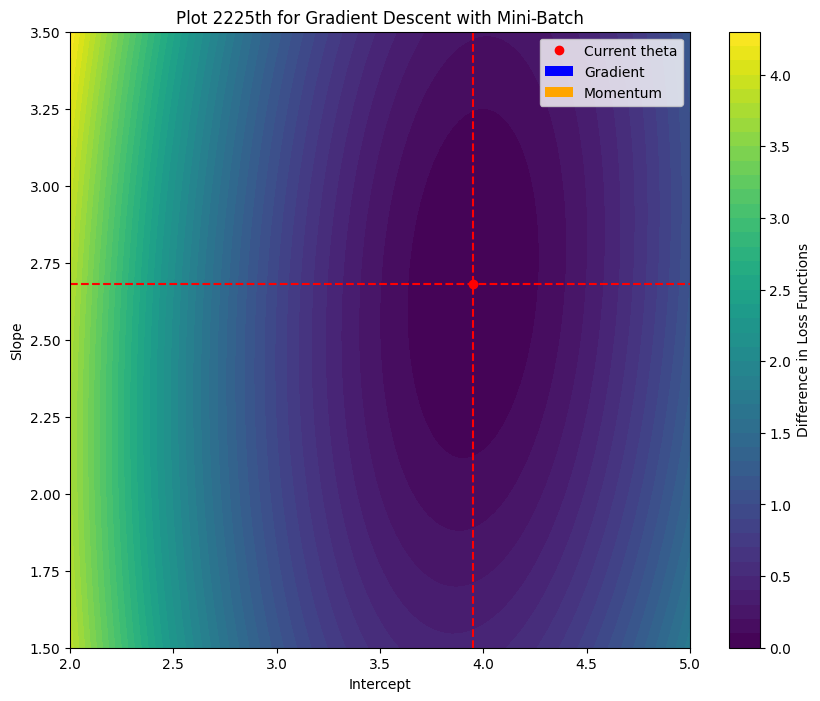

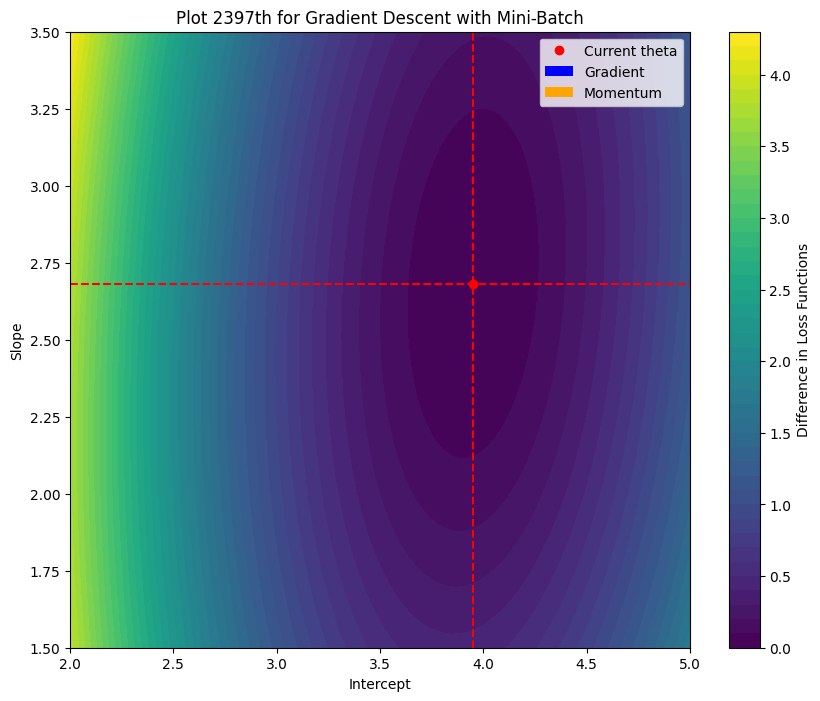

In [21]:
csv_file_path = 'true_gradient_mini_batch_momentum.csv'
df_csv = pd.read_csv(csv_file_path)

theta0_list_mini_batch = df_csv['val_theta0_mini_batch'].values
theta1_list_mini_batch = df_csv['val_theta1_mini_batch'].values
loss_list_mini_batch = df_csv['loss_values_mini_batch'].values
grad_theta0_list_mini_batch = df_csv['grad_theta0_mini_batch'].values
grad_theta1_list_mini_batch = df_csv['grad_theta1_mini_batch'].values
momentum_theta0_list_mini_batch = df_csv['momentum_theta0_mini_batch'].values
momentum_theta1_list_mini_batch = df_csv['momentum_theta1_mini_batch'].values

iterations = 15
val_skip = len(theta0_list_mini_batch) // iterations
print(val_skip)

iterations = np.linspace(0, len(theta0_list_mini_batch) - 1, iterations, dtype=int)

for a in iterations:
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(INTERCEPT, SLOPE, loss_grid, levels=50, cmap='viridis')
    plt.colorbar(contour, label="Difference in Loss Functions")
    plt.xlabel('Intercept')
    plt.ylabel('Slope')
    plt.title(f'Plot {a + 1}th for Gradient Descent with Mini-Batch')

    theta0 = theta0_list_mini_batch[a]
    theta1 = theta1_list_mini_batch[a]

    plt.plot(theta0, theta1, 'ro', label='Current theta')

    grad_theta0 = grad_theta0_list_mini_batch[a]
    grad_theta1 = grad_theta1_list_mini_batch[a]
    plt.quiver(theta0, theta1, -grad_theta0, -grad_theta1, color='blue', scale=5, label='Gradient', angles='xy')

    momentum_theta0 = momentum_theta0_list_mini_batch[a]
    momentum_theta1 = momentum_theta1_list_mini_batch[a]
    plt.quiver(theta0, theta1, momentum_theta0, momentum_theta1, color='orange', scale=5, label='Momentum', angles='xy')

    plt.axhline(y=theta1, color='red', linestyle='--')
    plt.axvline(x=theta0, color='red', linestyle='--')

    plt.legend()
    display(plt.gcf())
    clear_output(wait=True)
    time.sleep(0.4)

plt.show()

Saving the figures for animation

Saving the figures for animation

In [28]:
csv_file_path = 'true_gradient_mini_batch_momentum.csv'
df_csv = pd.read_csv(csv_file_path)

theta0_list_mini_batch = df_csv['val_theta0_mini_batch'].values
theta1_list_mini_batch = df_csv['val_theta1_mini_batch'].values
loss_list_mini_batch = df_csv['loss_values_mini_batch'].values
grad_theta0_list_mini_batch = df_csv['grad_theta0_mini_batch'].values
grad_theta1_list_mini_batch = df_csv['grad_theta1_mini_batch'].values
momentum_theta0_list_mini_batch = df_csv['momentum_theta0_mini_batch'].values
momentum_theta1_list_mini_batch = df_csv['momentum_theta1_mini_batch'].values

iterations = 200
val_skip = len(theta0_list_mini_batch) // iterations

iterations = np.linspace(0, len(theta0_list_mini_batch) - 1, iterations, dtype=int)

save_dir = '/Users/tejasmacipad/Desktop/Second_yr/Machine_Learning/es335-24-fall-assignment-2/Plot_figures/PLOT_MBYM'

for a in iterations:
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(INTERCEPT, SLOPE, loss_grid, levels=50, cmap='viridis')
    plt.colorbar(contour, label="Difference in Loss Functions")
    plt.xlabel('Intercept')
    plt.ylabel('Slope')
    plt.title(f'Plot {a + 1} for Gradient Descent with Mini-Batch and Momentum')

    theta0 = theta0_list_mini_batch[a]
    theta1 = theta1_list_mini_batch[a]

    plt.plot(theta0, theta1, 'ro', label='Current theta')

    grad_theta0 = grad_theta0_list_mini_batch[a]
    grad_theta1 = grad_theta1_list_mini_batch[a]
    plt.quiver(theta0, theta1, -grad_theta0, -grad_theta1, color='blue', scale=5, label='Gradient', angles='xy')

    momentum_theta0 = momentum_theta0_list_mini_batch[a]
    momentum_theta1 = momentum_theta1_list_mini_batch[a]
    plt.quiver(theta0, theta1, momentum_theta0, momentum_theta1, color='orange', scale=5, label='Momentum', angles='xy')

    plt.axhline(y=theta1, color='red', linestyle='--')
    plt.axvline(x=theta0, color='red', linestyle='--')

    plt.legend()

    image_path = os.path.join(save_dir, f'plot_mini_batch_momentum_{a + 1}.png')
    plt.savefig(image_path)
    plt.close()

print(f'All Mini-Batch momentum plots saved to {save_dir}')

All Mini-Batch momentum plots saved to /Users/tejasmacipad/Desktop/Second_yr/Machine_Learning/es335-24-fall-assignment-2/Plot_figures/PLOT_MBYM
